In [1]:
!pip install yfinance

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
stocks = input("Enter stock code: ")
data = yf.download(stocks, '2022-01-01', '2023-09-01', auto_adjust=True)
data.head()

# Facebook - FB2A.BE
# Natural Gas - NG=F
# USD/PHP - PHP=X

Enter stock code: NG=F
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,3.702,3.858,3.638,3.815,99069
2022-01-04,3.817,3.944,3.709,3.717,133394
2022-01-05,3.747,3.897,3.717,3.882,96811
2022-01-06,3.842,3.931,3.801,3.812,116579
2022-01-07,3.860,3.980,3.800,3.916,127012


In [8]:
data.shape

(418, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 418 entries, 2022-01-03 to 2023-08-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    418 non-null    float64
 1   High    418 non-null    float64
 2   Low     418 non-null    float64
 3   Close   418 non-null    float64
 4   Volume  418 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 19.6 KB


In [10]:
data.describe()

,Open,High,Low,Close,Volume
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,4.964761,5.148639,4.775062,4.952246,123043.799043
std,2.312844,2.406977,2.219601,2.312968,50669.479527
min,2.015000,2.083000,1.944000,1.991000,0.000000
25%,2.618500,2.674250,2.531250,2.593250,93601.750000
50%,4.726000,4.896500,4.506500,4.719500,118721.000000
75%,6.857500,7.074500,6.572750,6.856000,147947.250000
max,9.817000,10.028000,9.200000,9.680000,312252.000000


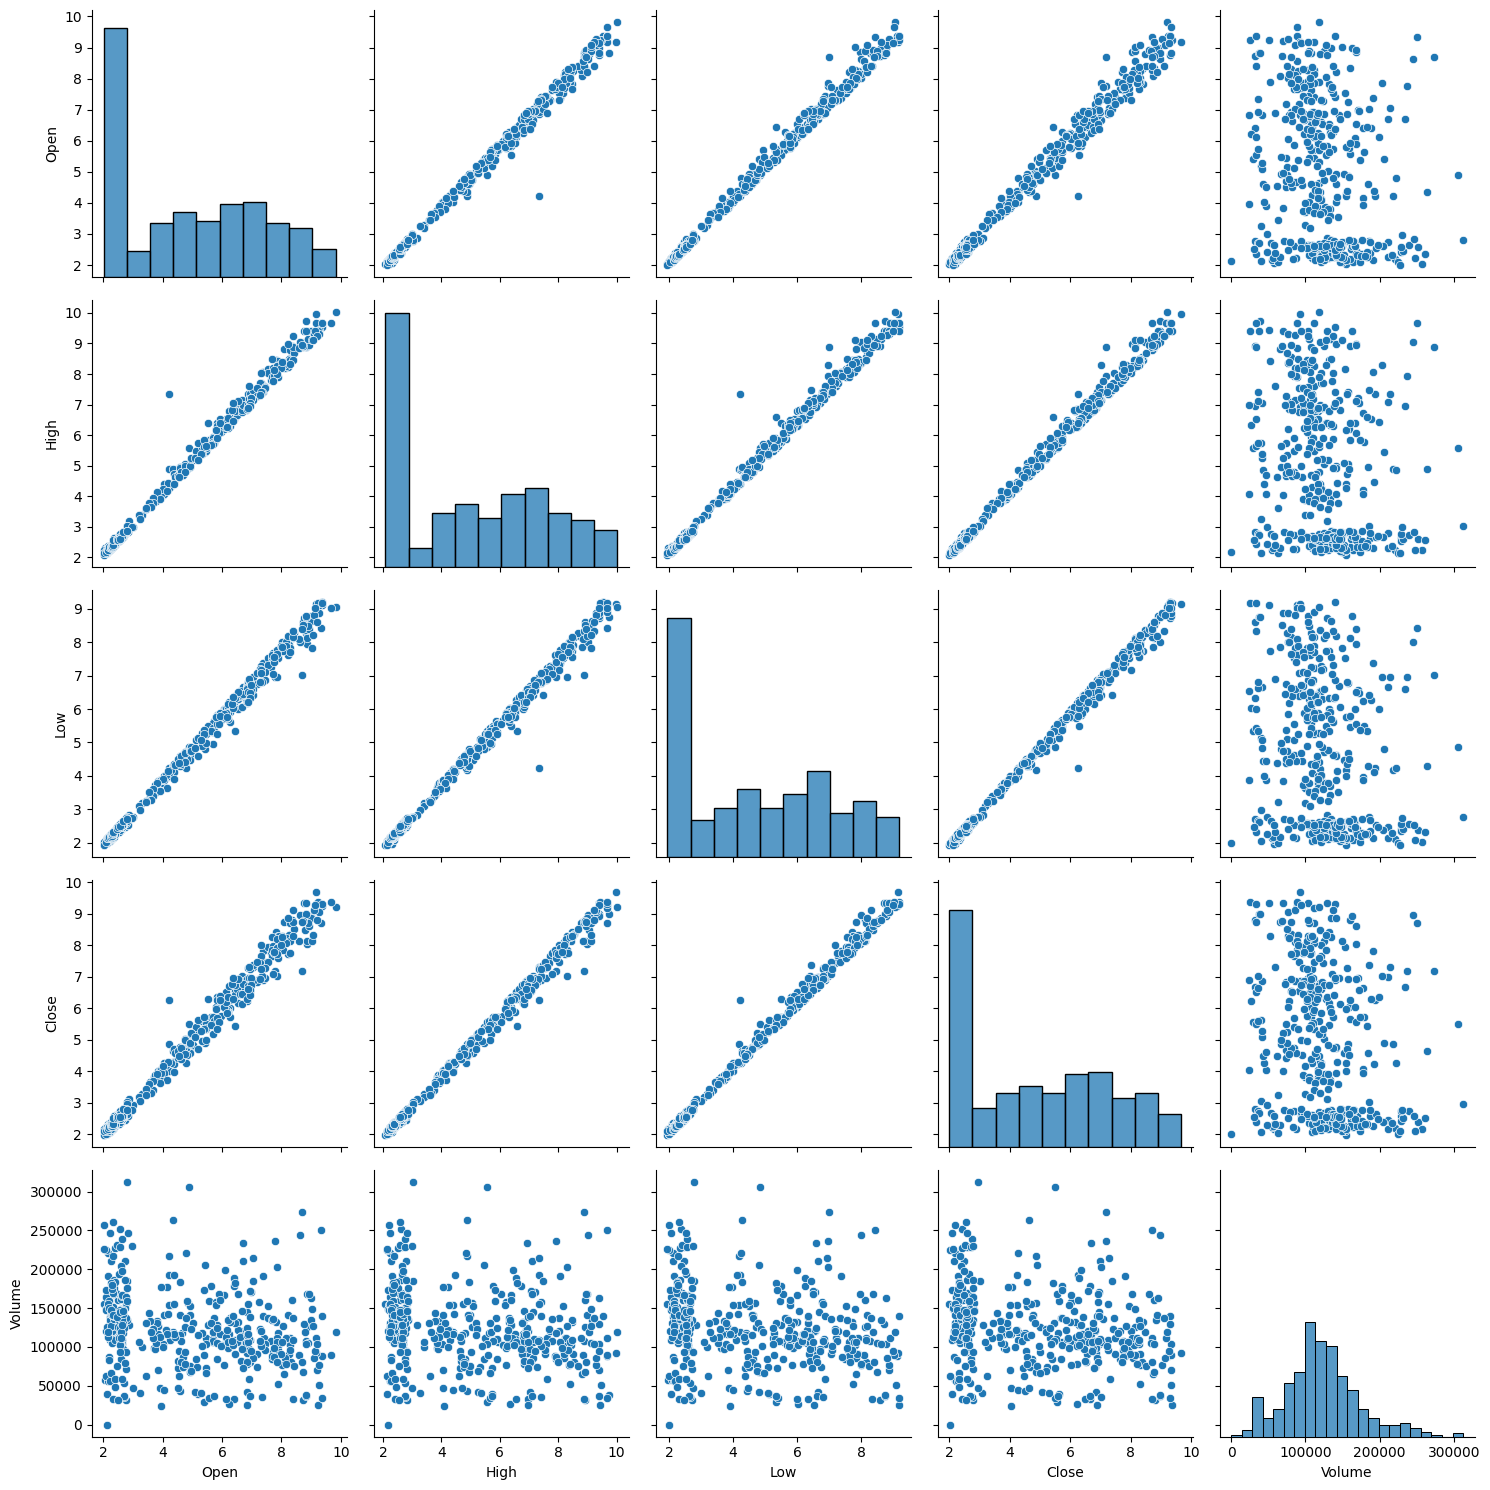

In [11]:
sns.pairplot(data, height = 3)
plt.tight_layout()

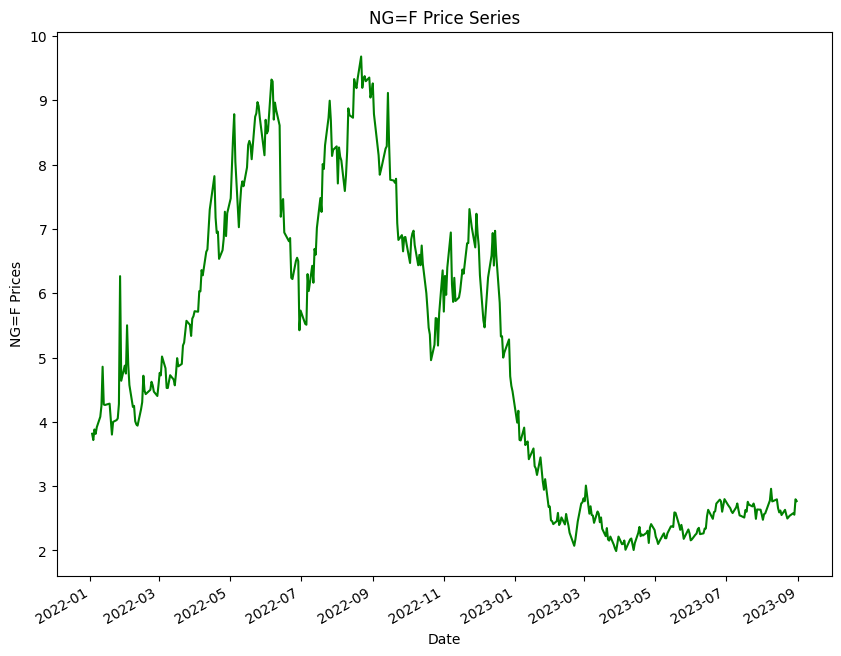

In [12]:
data.Close.plot(figsize= (10, 8), color = 'g')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

<Axes: xlabel='Close', ylabel='Count'>

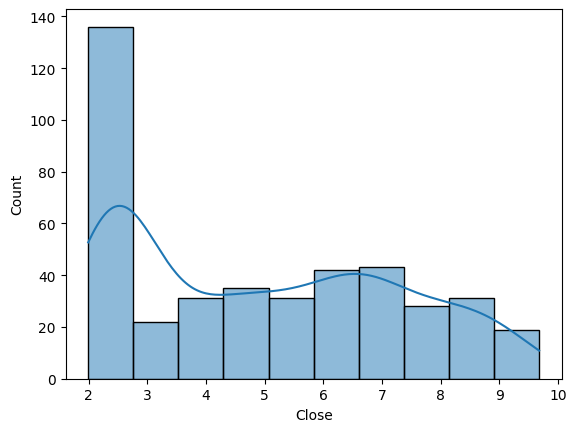

In [16]:
sns.histplot(data=data, x="Close", kde=True)

<Axes: xlabel='Open', ylabel='Count'>

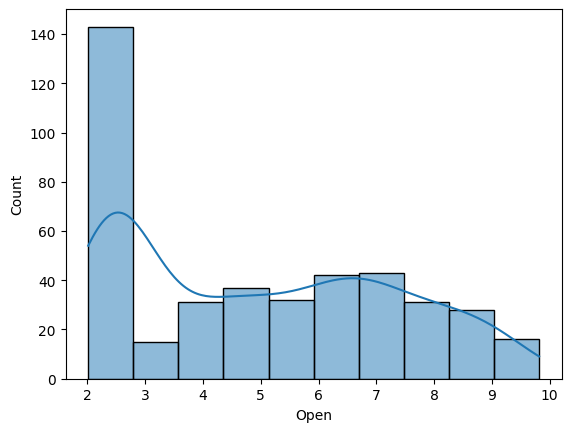

In [17]:
sns.histplot(data=data, x="Open", kde=True)

In [18]:

# Conclusion
# - Shape of data
# - data distribution
# - very non linear

# Linear, Logis, Regularized, SVM

X = data.drop("Close", axis = 1)
y = data['Close']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(334, 4)
(84, 4)
(334,)
(84,)


In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [20]:
# MSE - Mean Squared Error
# RMSE - Root Mean Squared Erorr
# r2_square - 1.0 (Good model)

from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, y_pred):
  '''
  y_test: Ground Truth
  y_pred: Model Predicted
  '''
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2_scores = r2_score(y_test, y_pred)

  print("MSE: ", mse)
  print("RMSE: ", rmse)
  print("R2 Score: ", r2_scores)

calculate_metrics(y_test, pred1)

MSE:  0.009344490946730375
RMSE:  0.09666690719543258
R2 Score:  0.9979981259400911


In [21]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(X_train, y_train)
ri = Ridge().fit(X_train, y_train)

la_p = la.predict(X_test)
ri_p = ri.predict(X_test)

In [22]:
calculate_metrics(y_test, la_p)

MSE:  0.17820313258072987
RMSE:  0.42214112874811177
R2 Score:  0.9618234711188096


In [23]:
calculate_metrics(y_test, ri_p)

MSE:  0.009286455314615447
RMSE:  0.09636625609940155
R2 Score:  0.9980105589369385


In [25]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.070 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.024 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.004 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.006 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.070 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.024 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.004 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.006 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.071 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

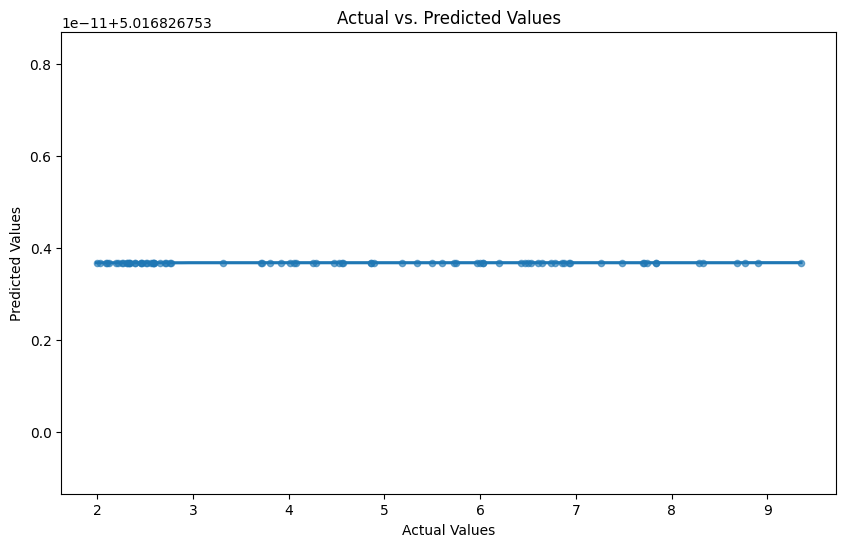

In [35]:
# Assuming grid is your fitted GridSearchCV object
predicted_values = grid.predict(X_test)

# Create a DataFrame to store actual vs. predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_values})

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual', y='Predicted', data=result_df, scatter_kws={'s': 20, 'alpha':0.6})
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()



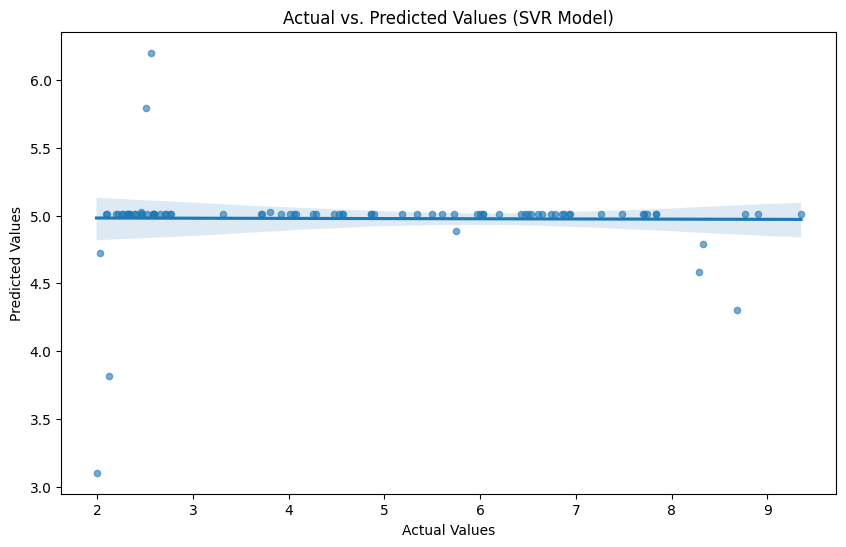

In [36]:
svr = SVR(C=10, gamma=0.01, kernel='rbf')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=svr_pred, scatter_kws={'s': 20, 'alpha':0.6})
plt.title('Actual vs. Predicted Values (SVR Model)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()